In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [21]:
# Load the California Housing dataset
data = fetch_california_housing()
features = data.data
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)
scaled_features = torch.tensor(scaled_features, dtype=torch.float32)

In [22]:
# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(scaled_features.shape[1], 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        validity = self.model(x)
        return validity

In [23]:
# Generator Network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, scaled_features.shape[1]),
            nn.Tanh()
        )

    def forward(self, x):
        generated_data = self.model(x)
        return generated_data

In [24]:
# Initialize the networks
discriminator = Discriminator()
generator     = Generator()

# Loss function and optimizers
adversarial_loss = nn.BCELoss()
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)

In [27]:
# Training loop
num_epochs = 300
batch_size = 64

In [28]:
# for i, real_data in enumerate(dataloader):
#     print (i, real_data.size())

In [29]:
dataloader = DataLoader(scaled_features, batch_size=batch_size, shuffle=True)

#### Training the GAN

In [30]:
for epoch in range(num_epochs):
    
    for i, real_data in enumerate(dataloader):
        # Adversarial ground truth labels
        valid = torch.ones(real_data.size(0), 1)
        fake = torch.zeros(real_data.size(0), 1)

        # Train the discriminator
        optimizer_D.zero_grad()

        real_pred = discriminator(real_data)
        d_real_loss = adversarial_loss(real_pred, valid)

        z = torch.randn(real_data.size(0), 100)
        fake_data = generator(z)
        fake_pred = discriminator(fake_data.detach())
        d_fake_loss = adversarial_loss(fake_pred, fake)

        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train the generator
        optimizer_G.zero_grad()

        z = torch.randn(real_data.size(0), 100)
        generated_data = generator(z)
        fake_pred = discriminator(generated_data)
        g_loss = adversarial_loss(fake_pred, valid)

        g_loss.backward()
        optimizer_G.step()

        if i % 10 == 0:
            print(
                f" Epoch [{epoch}/{num_epochs}], Batch Step [{i}/{len(dataloader)}],"
                f" D_loss: {d_loss.item():.4f},  G_loss: {g_loss.item():.4f}"
            )

 Epoch [0/300], Batch Step [0/323], D_loss: 1.3959,  G_loss: 0.7651
 Epoch [0/300], Batch Step [10/323], D_loss: 1.3563,  G_loss: 0.7495
 Epoch [0/300], Batch Step [20/323], D_loss: 1.3299,  G_loss: 0.7361
 Epoch [0/300], Batch Step [30/323], D_loss: 1.3056,  G_loss: 0.7255
 Epoch [0/300], Batch Step [40/323], D_loss: 1.2624,  G_loss: 0.7251
 Epoch [0/300], Batch Step [50/323], D_loss: 1.2340,  G_loss: 0.7390
 Epoch [0/300], Batch Step [60/323], D_loss: 1.1917,  G_loss: 0.7627
 Epoch [0/300], Batch Step [70/323], D_loss: 1.1655,  G_loss: 0.7844
 Epoch [0/300], Batch Step [80/323], D_loss: 1.1252,  G_loss: 0.7972
 Epoch [0/300], Batch Step [90/323], D_loss: 1.0984,  G_loss: 0.8047
 Epoch [0/300], Batch Step [100/323], D_loss: 1.0722,  G_loss: 0.8124
 Epoch [0/300], Batch Step [110/323], D_loss: 1.0693,  G_loss: 0.8245
 Epoch [0/300], Batch Step [120/323], D_loss: 0.9984,  G_loss: 0.8323
 Epoch [0/300], Batch Step [130/323], D_loss: 0.9384,  G_loss: 0.8684
 Epoch [0/300], Batch Step [140

In [31]:
# Set the generator network to evaluation mode
generator.eval()

# Generate new samples
num_samples = 10
z = torch.randn(num_samples, 100)  # Generate random noise as input
with torch.no_grad():
    generated_samples = generator(z)

# Process the generated samples as needed
# For example, you can denormalize them if necessary

# Print or visualize the generated samples
for i in range(num_samples):
    sample = generated_samples[i]
    print(sample)  # You can modify this to suit your needs

tensor([-0.4698, -0.7564, -0.8364, -0.0569, -0.0765, -0.0394, -0.8818,  0.6957])
tensor([-0.4888,  0.9998, -0.4053, -0.0449, -0.4048,  0.0500, -0.8179,  0.6407])
tensor([-0.9799, -0.0028, -0.9977,  0.0787, -0.7824,  0.1656, -0.9112,  0.6996])
tensor([ 0.4046, -0.5854,  0.5164, -0.1330,  0.0297, -0.0474,  0.9150, -0.4882])
tensor([ 0.0185, -1.0000, -0.4563, -0.1531,  0.0083, -0.0806, -0.8463,  0.7203])
tensor([-0.9989, -0.4726, -0.0561,  0.0695, -0.4967, -0.0629,  0.6374, -0.3592])
tensor([-0.4662,  0.4351, -0.2064, -0.0839, -0.0271,  0.1298, -0.7779,  0.6304])
tensor([-0.2304,  0.8199, -0.9440, -0.1088, -0.1856, -0.0710, -0.7066,  0.5482])
tensor([-0.4999, -0.3969, -0.0875, -0.1872,  0.5188, -0.0376,  0.9808, -0.6532])
tensor([ 0.2829,  0.4759, -0.0372, -0.0679, -0.0743, -0.0042, -0.7686,  0.7116])


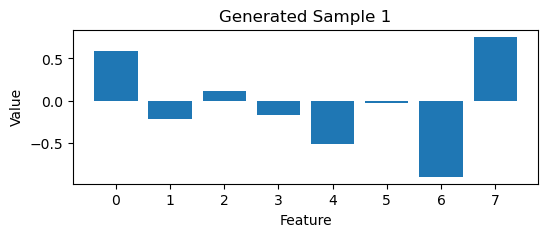

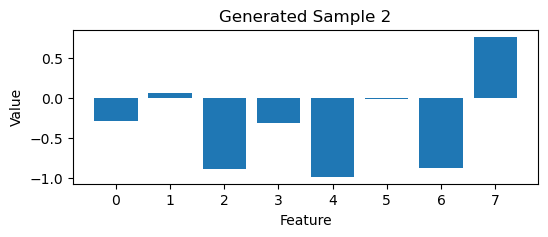

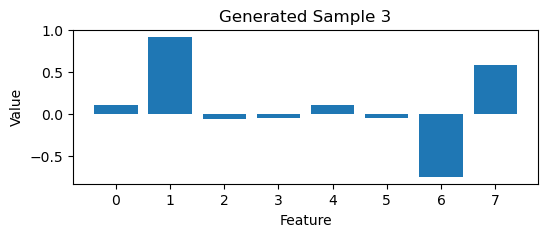

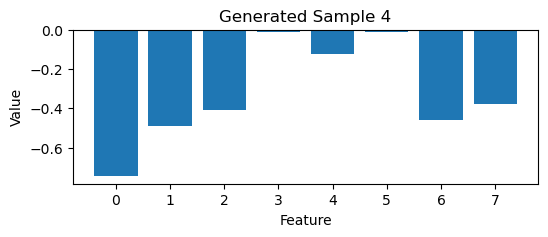

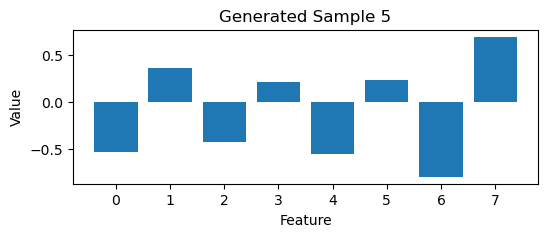

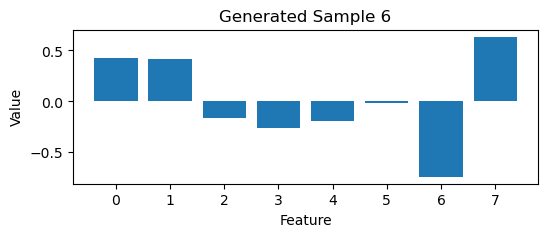

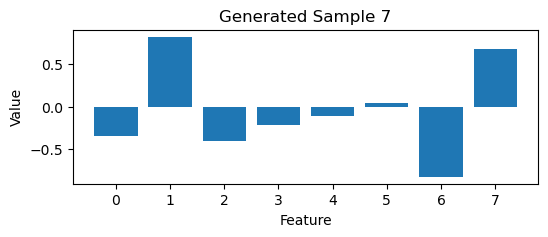

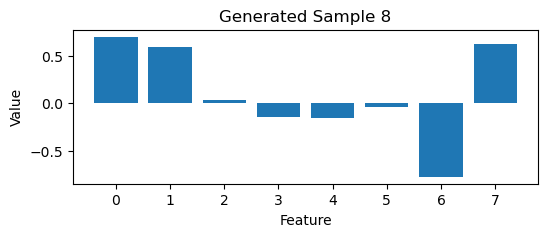

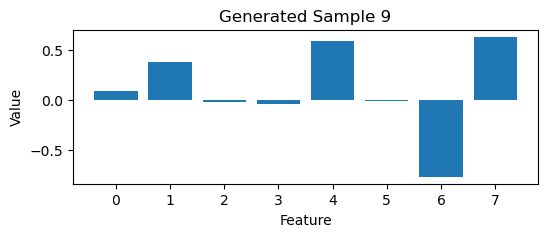

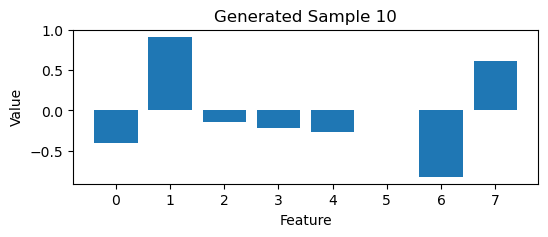

In [32]:
import matplotlib.pyplot as plt

# Generate new samples
num_samples = 10
z = torch.randn(num_samples, 100)  # Generate random noise as input
with torch.no_grad():
    generated_samples = generator(z)

# Convert the generated samples to a numpy array
generated_samples = generated_samples.cpu().numpy()

# Plot the generated samples
for i in range(num_samples):
    sample = generated_samples[i]
    plt.figure(figsize=(6, 2))
    plt.bar(range(sample.shape[0]), sample)
    plt.xlabel('Feature')
    plt.ylabel('Value')
    plt.title(f'Generated Sample {i+1}')
    plt.show()


In [33]:
# Save the GAN model
torch.save( {
            'scaler':                   scaler,
            'generator_state_dict':     generator.state_dict(),
            'discriminator_state_dict': discriminator.state_dict(),
            }, 
    r'C:\Users\bhupe\OneDrive\AI-notebook-dir\300 - ADL - Advanced Deep Learning\50 - ADL - Generative Models\51 - GANs - New folder\model\gan_model_cal_housing.pt')

#### Load model from saved artifacts

In [34]:
import torch
import torch.nn as nn

In [35]:
# Generator Network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 8),
            nn.Tanh()
        )

    def forward(self, x):
        generated_data = self.model(x)
        return generated_data

In [11]:
# Initialize the networks
#discriminator = Discriminator()
generator     = Generator()

In [36]:
# Load the GAN model
checkpoint = torch.load(r'C:\Users\bhupe\OneDrive\AI-notebook-dir\300 - ADL - Advanced Deep Learning\50 - ADL - Generative Models\51 - GANs - New folder\model\gan_model_cal_housing.pt')

generator.load_state_dict(checkpoint['generator_state_dict'])
#discriminator.load_state_dict(checkpoint['discriminator_state_dict'])

<All keys matched successfully>

In [37]:
# Set the generator network to evaluation mode
generator.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=8, bias=True)
    (5): Tanh()
  )
)

In [38]:
# Generate new samples
num_samples = 10
z = torch.randn(num_samples, 100)  # Generate random noise as input

In [39]:
with torch.no_grad():
    generated_samples = generator(z)

In [40]:
generated_samples.shape

torch.Size([10, 8])